In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
diabetes = datasets.baseload_diabetes()

AttributeError: 'module' object has no attribute 'baseload_diabetes'

In [3]:
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()

In [4]:
df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(353, 10) (353L,)
(89, 10) (89L,)


In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [19]:
predictions[0:5]

array([ 253.69197631,   55.75597581,  117.90033877,  196.228645  ,
        108.4367435 ])

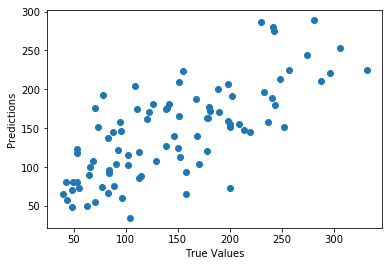

In [20]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [21]:
model.score(X_test, y_test)

0.52628893499867879

In [22]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [34]:
scores = cross_val_score(model, df, y, cv=6)
print (scores)

[ 0.4554861   0.46138572  0.40094084  0.55220736  0.43942775  0.56923406]


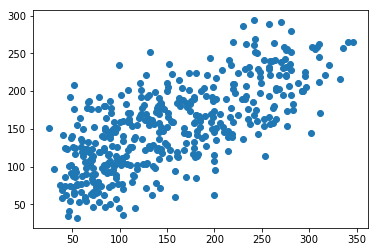

In [35]:
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y ,predictions)
plt.show()

In [36]:
metrics.r2_score(y, predictions)

0.49080658386407738